In [ ]:
!pip install ipython --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 604.1/604.1 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 42.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 6.4 MB/s eta 0:00:00
  Attempting uninstall: traitlets
    Found existing installation: traitlets 5.7.1
    Uninstalling traitlets-5.7.1:
      Successfully uninstalled traitlets-5.7.1
  Attempting uninstall: ipython
    Found existing installation: ipython 7.34.0
    Uninstalling ipython-7.34.0:
      Successfully uninstalled ipython-7.34.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipython==7.34.0, but you have ipython 9.1.0 which is incompatible.


In [ ]:
!pip install jedi>=0.16

In [ ]:
!pip install tpot==0.12.2

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 10.9 MB/s eta 0:00:00
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11938 sha256=994a07ef325b8b6ca3e486bff0e9384c09a47435113ded7afdd1c087feebc4b5
  Stored in directory: /root/.cache/pip/wheels/da/77/2d/adbc56bc4db95ad80c6d4e71cd69e2d9d122174904342e3f7f
Successfully built stopit


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
from tpot import TPOTClassifier

In [ ]:
# Load dataset
file_path = 'Lumpy skin disease data.csv'
data = pd.read_csv(file_path)

In [ ]:
data = data.drop(['region', 'country', 'reportingDate'], axis=1)

In [ ]:
data = data.dropna()

In [ ]:
X = data.drop('lumpy', axis=1)
y = data['lumpy']

In [ ]:
y = LabelEncoder().fit_transform(y)

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled)

In [ ]:
numeric_df = data.select_dtypes(include=['number'])

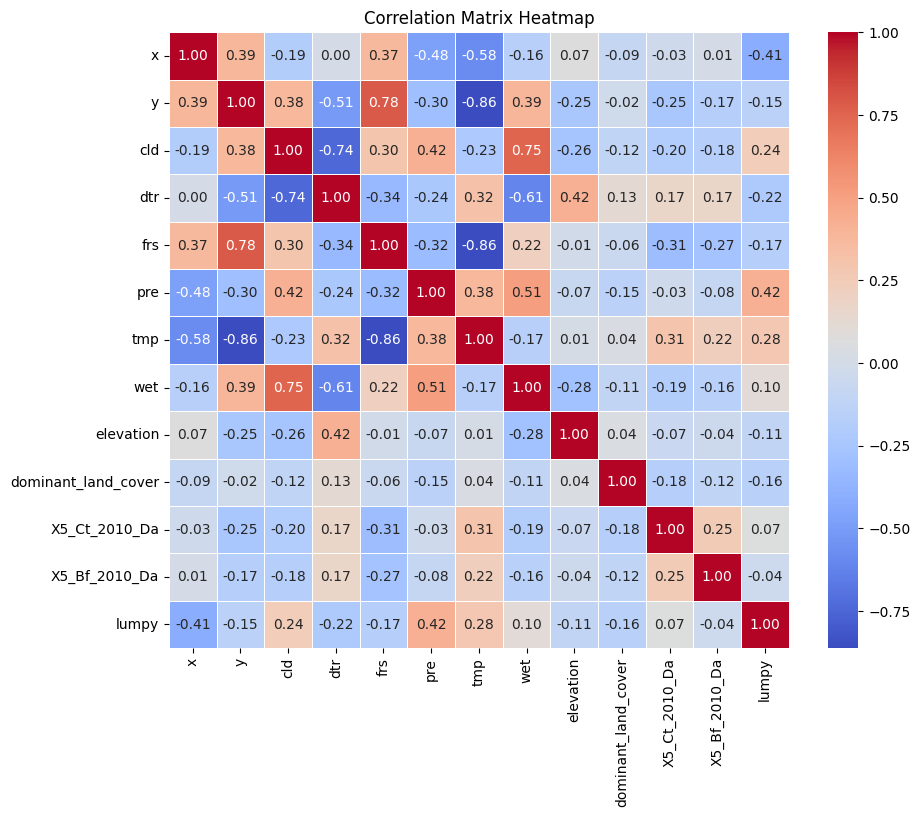

In [ ]:
corr_matrix = numeric_df.corr()
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


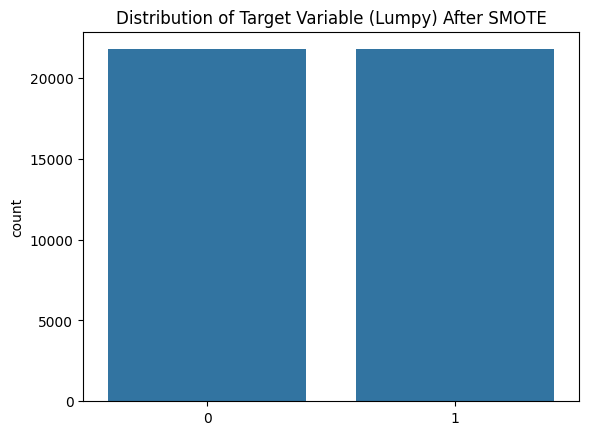

In [ ]:
sns.countplot(x=y_resampled)
plt.title('Distribution of Target Variable (Lumpy) After SMOTE')
plt.show()

TPOT

In [ ]:
tpot = TPOTClassifier(generations=1, population_size=50, cv=5, random_state=42, verbosity=2)

# Fit TPOTClassifier
tpot.fit(X_train, y_train)
best_pipeline = tpot.fitted_pipeline_

# Evaluate performance
print("Best pipeline:", best_pipeline)

is_classifier
is_regressor


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1230: FutureWarning: passing a class to None is deprecated and will be removed in 1.8. Use an instance of the class instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1270: FutureWarning: passing a class to None is deprecated and will be removed in 1.8. Use an instance of the class instead.
  warnings.warn(


is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_classifier
is_classifier
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_classifier
is_classifier
is_classifier
is_classifier
is_classifier
is_classifier
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_classifier
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier


Version 0.12.2 of tpot is outdated. Version 1.0.0 was released Wednesday February 26, 2025.


Optimization Progress:   0%|          | 0/100 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9784371182240312

Best pipeline: GradientBoostingClassifier(input_matrix, learning_rate=0.1, max_depth=9, max_features=0.9500000000000001, min_samples_leaf=10, min_samples_split=12, n_estimators=100, subsample=0.4)
Best pipeline: Pipeline(steps=[('gradientboostingclassifier',
                 GradientBoostingClassifier(max_depth=9,
                                            max_features=0.9500000000000001,
                                            min_samples_leaf=10,
                                            min_samples_split=12,
                                            random_state=42, subsample=0.4))])


In [ ]:
y_pred = best_pipeline.predict(X_test)
roc_score = roc_auc_score(y_test, best_pipeline.predict_proba(X_test)[:, 1])
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_score)

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      6530
           1       0.98      0.99      0.98      6529

    accuracy                           0.98     13059
   macro avg       0.98      0.98      0.98     13059
weighted avg       0.98      0.98      0.98     13059

ROC AUC Score: 0.9974829579984413


TPOT with Stratified KFold

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Extract the best pipeline from TPOT (already fitted)
best_pipeline = tpot.fitted_pipeline_

# Initialize Stratified K-Fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform Stratified K-Fold cross-validation
skf_scores = cross_val_score(best_pipeline, X_train, y_train, cv=skf, scoring='accuracy')

# Output results
print("Stratified K-Fold Cross Validation Scores: ", skf_scores)
print("Mean Stratified K-Fold Score: ", skf_scores.mean())


Stratified K-Fold Cross Validation Scores:  [0.97751887 0.98178536 0.97751887 0.97505743 0.97866404]
Mean Stratified K-Fold Score:  0.9781089157873548


TPOT with KFold

In [ ]:
from sklearn.model_selection import KFold, cross_val_score

# Extract the best pipeline from TPOT (already fitted)
best_pipeline = tpot.fitted_pipeline_

# Initialize K-Fold Cross Validation (e.g., 5 folds)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform K-Fold CV on the best pipeline
kf_scores = cross_val_score(best_pipeline, X_train, y_train, cv=kf, scoring='accuracy')

# Output results
print("K-Fold Cross Validation Scores: ", kf_scores)
print("Mean K-Fold CV Score: ", kf_scores.mean())


K-Fold Cross Validation Scores:  [0.9765343  0.97866754 0.97998031 0.97833935 0.97899229]
Mean K-Fold CV Score:  0.9785027565568175


In [ ]:
!pip install lime

In [ ]:
from lime import lime_tabular

# Convert X_test to a Pandas DataFrame for using .iloc
X_test_df = pd.DataFrame(X_test, columns=X.columns)

# Create a LimeTabularExplainer instance
explainer = lime_tabular.LimeTabularExplainer(
    training_data=X_train,  # Or X if using original data
    feature_names=X.columns,
    class_names=['0', '1'], # Assuming binary classification
    mode='classification'
)

# Now you can use .iloc
exp = explainer.explain_instance(X_test_df.iloc[0], best_pipeline.predict_proba)
exp.show_in_notebook()

/usr/local/lib/python3.11/dist-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.11/dist-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.11/dist-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.

<ipython-input-30-537b4840c161>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=values, y=features, palette=colors)


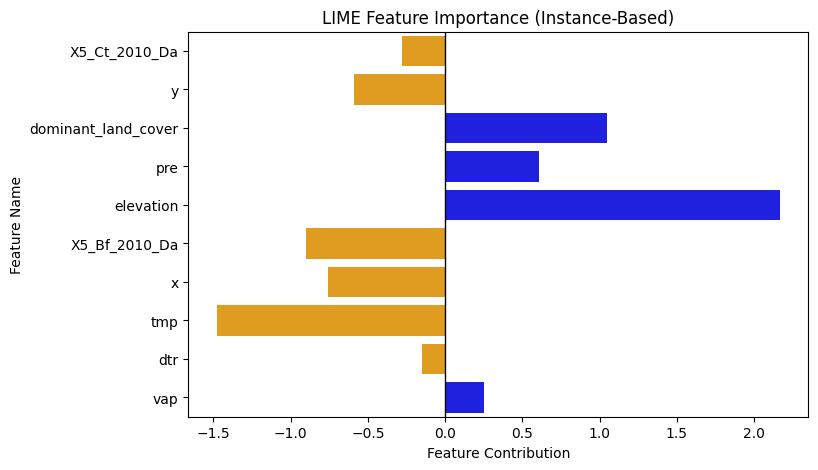

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data from the image
features = ["X5_Ct_2010_Da", "y", "dominant_land_cover", "pre", "elevation",
            "X5_Bf_2010_Da", "x", "tmp", "dtr", "vap"]
values = [-0.28, -0.59, 1.05, 0.61, 2.17, -0.90, -0.76, -1.48, -0.15, 0.25]

# Set figure size
plt.figure(figsize=(8, 5))

# Color based on value: Orange for negative, Blue for positive
colors = ["orange" if v < 0 else "blue" for v in values]

# Create bar plot
sns.barplot(x=values, y=features, palette=colors)

# Add labels and title
plt.xlabel("Feature Contribution")
plt.ylabel("Feature Name")
plt.title("LIME Feature Importance (Instance-Based)")

# Add vertical reference line at zero
plt.axvline(0, color="black", linewidth=1)

# Show plot
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, roc_curve, auc
y_train_pred = best_pipeline.predict(X_train)
y_test_pred = best_pipeline.predict(X_test)

# Get predicted probabilities for ROC curve
y_test_proba = best_pipeline.predict_proba(X_test)[:, 1] if hasattr(best_pipeline, "predict_proba") else None

# Compute accuracy and log loss
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_loss = log_loss(y_train, best_pipeline.predict_proba(X_train)) if hasattr(best_pipeline, "predict_proba") else None
test_loss = log_loss(y_test, best_pipeline.predict_proba(X_test)) if hasattr(best_pipeline, "predict_proba") else None


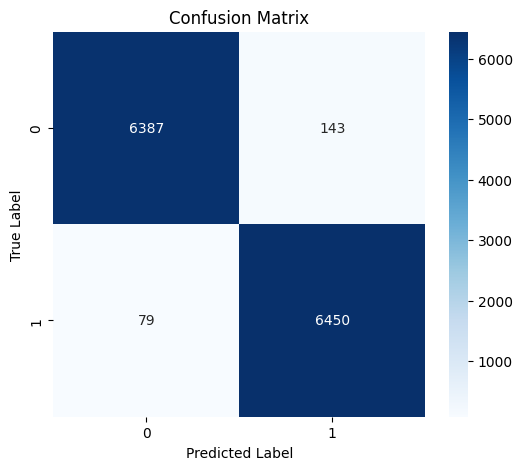

In [ ]:
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

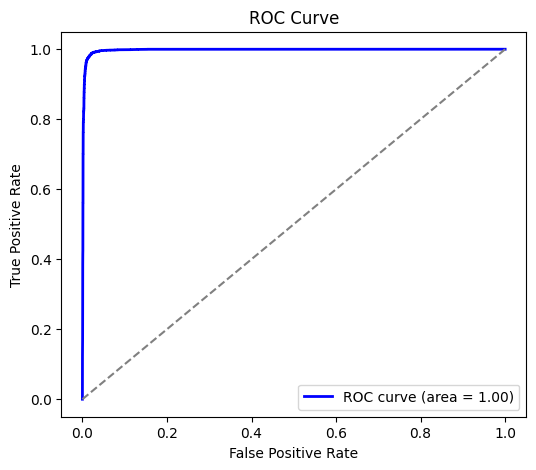

In [ ]:
if y_test_proba is not None:
    fpr, tpr, _ = roc_curve(y_test, y_test_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (area = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.3, callbacks=[early_stopping], verbose=1)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


667/667 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8379 - loss: 0.3790 - val_accuracy: 0.9070 - val_loss: 0.2186
Epoch 2/100
667/667 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9040 - loss: 0.2362 - val_accuracy: 0.9195 - val_loss: 0.1958
Epoch 3/100
667/667 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9078 - loss: 0.2219 - val_accuracy: 0.9221 - val_loss: 0.1869
Epoch 4/100
667/667 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9156 - loss: 0.2044 - val_accuracy: 0.9255 - val_loss: 0.1788
Epoch 5/100
667/667 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9217 - loss: 0.1958 - val_accuracy: 0.9372 - val_loss: 0.1727
Epoch 6/100
667/667 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9195 - loss: 0.1923 - val_accuracy: 0.9328 - val_loss: 0.1689
Epoch 7/100
667/667 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9234 - loss: 0.1848 - val_accuracy: 0.9350 - val_loss: 0.1647
Epoch 8/100
667/667 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9262 - loss: 0.1798 - val_accuracy: 0.9378

In [ ]:
# Evaluate the model
eval_results = model.evaluate(X_test, y_test, verbose=0)
y_pred = (model.predict(X_test) > 0.5).astype(int).flatten()
roc_score = roc_auc_score(y_test, model.predict(X_test))

# Print performance metrics
print("Test Loss:", eval_results[0])
print("Test Accuracy:", eval_results[1])
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_score)

409/409 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
409/409 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Test Loss: 0.11006972193717957
Test Accuracy: 0.9588789343833923
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.96      6530
           1       0.95      0.97      0.96      6529

    accuracy                           0.96     13059
   macro avg       0.96      0.96      0.96     13059
weighted avg       0.96      0.96      0.96     13059

ROC AUC Score: 0.9919170143712689


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Embedding
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# Reshape X_train to be 3-dimensional
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# LSTM Classifier
# Build the model
model = Sequential()
model.add(LSTM(64, activation='tanh', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True)) # Now X_train.shape[2] will exist
model.add(Dropout(0.2))
model.add(LSTM(32, activation='tanh', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.3, callbacks=[early_stopping], verbose=1)

# Evaluate the model
eval_results = model.evaluate(X_test, y_test, verbose=0)
y_pred = (model.predict(X_test) > 0.5).astype(int).flatten()
roc_score = roc_auc_score(y_test, model.predict(X_test))

Epoch 1/100
667/667 ━━━━━━━━━━━━━━━━━━━━ 24s 24ms/step - accuracy: 0.8159 - loss: 0.3963 - val_accuracy: 0.8969 - val_loss: 0.2649
Epoch 2/100
667/667 ━━━━━━━━━━━━━━━━━━━━ 17s 19ms/step - accuracy: 0.8881 - loss: 0.2721 - val_accuracy: 0.8969 - val_loss: 0.2624
Epoch 3/100
667/667 ━━━━━━━━━━━━━━━━━━━━ 19s 17ms/step - accuracy: 0.8971 - loss: 0.2539 - val_accuracy: 0.9025 - val_loss: 0.2393
Epoch 4/100
667/667 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - accuracy: 0.9060 - loss: 0.2356 - val_accuracy: 0.9149 - val_loss: 0.2129
Epoch 5/100
667/667 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - accuracy: 0.9150 - loss: 0.2166 - val_accuracy: 0.9200 - val_loss: 0.1964
Epoch 6/100
667/667 ━━━━━━━━━━━━━━━━━━━━ 22s 19ms/step - accuracy: 0.9177 - loss: 0.2025 - val_accuracy: 0.9232 - val_loss: 0.1879
Epoch 7/100
667/667 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.9221 - loss: 0.1995 - val_accuracy: 0.9252 - val_loss: 0.1816
Epoch 8/100
667/667 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.9253 - loss: 0

In [ ]:
print("Test Loss:", eval_results[0])
print("Test Accuracy:", eval_results[1])
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_score)

Test Loss: 0.09082013368606567
Test Accuracy: 0.9700589776039124
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.95      0.97      6530
           1       0.95      0.99      0.97      6529

    accuracy                           0.97     13059
   macro avg       0.97      0.97      0.97     13059
weighted avg       0.97      0.97      0.97     13059

ROC AUC Score: 0.9934145620071319


In [ ]:
from tensorflow.keras.layers import Dense, Dropout, LSTM, Bidirectional

In [ ]:
model = Sequential()
model.add(Bidirectional(LSTM(64, activation='tanh', return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(32, activation='tanh', return_sequences=False)))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.3, callbacks=[early_stopping], verbose=1)


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


667/667 ━━━━━━━━━━━━━━━━━━━━ 31s 34ms/step - accuracy: 0.8251 - loss: 0.3781 - val_accuracy: 0.8964 - val_loss: 0.2516
Epoch 2/100
667/667 ━━━━━━━━━━━━━━━━━━━━ 19s 29ms/step - accuracy: 0.8921 - loss: 0.2608 - val_accuracy: 0.9053 - val_loss: 0.2321
Epoch 3/100
667/667 ━━━━━━━━━━━━━━━━━━━━ 21s 31ms/step - accuracy: 0.9007 - loss: 0.2335 - val_accuracy: 0.9202 - val_loss: 0.1956
Epoch 4/100
667/667 ━━━━━━━━━━━━━━━━━━━━ 20s 30ms/step - accuracy: 0.9151 - loss: 0.2048 - val_accuracy: 0.9288 - val_loss: 0.1787
Epoch 5/100
667/667 ━━━━━━━━━━━━━━━━━━━━ 20s 29ms/step - accuracy: 0.9233 - loss: 0.1849 - val_accuracy: 0.9301 - val_loss: 0.1802
Epoch 6/100
667/667 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - accuracy: 0.9346 - loss: 0.1668 - val_accuracy: 0.9385 - val_loss: 0.1577
Epoch 7/100
667/667 ━━━━━━━━━━━━━━━━━━━━ 19s 28ms/step - accuracy: 0.9402 - loss: 0.1568 - val_accuracy: 0.9348 - val_loss: 0.1595
Epoch 8/100
667/667 ━━━━━━━━━━━━━━━━━━━━ 22s 30ms/step - accuracy: 0.9410 - loss: 0.1533 - val_

In [ ]:
eval_results = model.evaluate(X_test, y_test, verbose=0)
y_pred = (model.predict(X_test) > 0.5).astype(int).flatten()
roc_score = roc_auc_score(y_test, model.predict(X_test))

# Print performance metrics
print("Test Loss:", eval_results[0])
print("Test Accuracy:", eval_results[1])
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_score)

409/409 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step
409/409 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step
Test Loss: 0.09634295850992203
Test Accuracy: 0.9667662382125854
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.97      6530
           1       0.95      0.98      0.97      6529

    accuracy                           0.97     13059
   macro avg       0.97      0.97      0.97     13059
weighted avg       0.97      0.97      0.97     13059

ROC AUC Score: 0.9928659084208351


In [ ]:
from tensorflow.keras.layers import Dense, Dropout, GRU

In [ ]:
model = Sequential()
model.add(GRU(64, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], 1))) # Changed input_shape
model.add(Dropout(0.2))
model.add(GRU(32, activation='tanh', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.3, callbacks=[early_stopping], verbose=1)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


667/667 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - accuracy: 0.7945 - loss: 0.4271 - val_accuracy: 0.8994 - val_loss: 0.2531
Epoch 2/100
667/667 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - accuracy: 0.8978 - loss: 0.2519 - val_accuracy: 0.9077 - val_loss: 0.2205
Epoch 3/100
667/667 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - accuracy: 0.9106 - loss: 0.2220 - val_accuracy: 0.9210 - val_loss: 0.2078
Epoch 4/100
667/667 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - accuracy: 0.9145 - loss: 0.2172 - val_accuracy: 0.9115 - val_loss: 0.2096
Epoch 5/100
667/667 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.9174 - loss: 0.2072 - val_accuracy: 0.9231 - val_loss: 0.1953
Epoch 6/100
667/667 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.9219 - loss: 0.1990 - val_accuracy: 0.9309 - val_loss: 0.1843
Epoch 7/100
667/667 ━━━━━━━━━━━━━━━━━━━━ 14s 21ms/step - accuracy: 0.9216 - loss: 0.1951 - val_accuracy: 0.9311 - val_loss: 0.1823
Epoch 8/100
667/667 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.9245 - loss: 0.1905 - val_

In [ ]:
eval_results = model.evaluate(X_test, y_test, verbose=0)
y_pred = (model.predict(X_test) > 0.5).astype(int).flatten()
roc_score = roc_auc_score(y_test, model.predict(X_test))

# Print performance metrics
print("Test Loss:", eval_results[0])
print("Test Accuracy:", eval_results[1])
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_score)

409/409 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step
409/409 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Test Loss: 0.09090731292963028
Test Accuracy: 0.9692932367324829
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.97      6530
           1       0.96      0.98      0.97      6529

    accuracy                           0.97     13059
   macro avg       0.97      0.97      0.97     13059
weighted avg       0.97      0.97      0.97     13059

ROC AUC Score: 0.9934375481565695


In [ ]:
from tensorflow.keras.layers import Dense, Dropout, GRU, Bidirectional

In [ ]:
model = Sequential()
model.add(Bidirectional(GRU(64, activation='tanh', return_sequences=True), input_shape=(X_train.shape[1], 1))) # Changed input_shape to (X_train.shape[1], 1)
model.add(Dropout(0.2))
model.add(Bidirectional(GRU(32, activation='tanh', return_sequences=False)))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=1)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


762/762 ━━━━━━━━━━━━━━━━━━━━ 36s 35ms/step - accuracy: 0.8593 - loss: 0.3492 - val_accuracy: 0.9091 - val_loss: 0.2161
Epoch 2/100
762/762 ━━━━━━━━━━━━━━━━━━━━ 25s 33ms/step - accuracy: 0.9178 - loss: 0.2015 - val_accuracy: 0.9309 - val_loss: 0.1760
Epoch 3/100
762/762 ━━━━━━━━━━━━━━━━━━━━ 25s 33ms/step - accuracy: 0.9332 - loss: 0.1739 - val_accuracy: 0.9327 - val_loss: 0.1661
Epoch 4/100
762/762 ━━━━━━━━━━━━━━━━━━━━ 41s 32ms/step - accuracy: 0.9374 - loss: 0.1626 - val_accuracy: 0.9463 - val_loss: 0.1444
Epoch 5/100
762/762 ━━━━━━━━━━━━━━━━━━━━ 25s 32ms/step - accuracy: 0.9409 - loss: 0.1503 - val_accuracy: 0.9501 - val_loss: 0.1339
Epoch 6/100
762/762 ━━━━━━━━━━━━━━━━━━━━ 43s 35ms/step - accuracy: 0.9474 - loss: 0.1452 - val_accuracy: 0.9495 - val_loss: 0.1321
Epoch 7/100
762/762 ━━━━━━━━━━━━━━━━━━━━ 41s 35ms/step - accuracy: 0.9493 - loss: 0.1362 - val_accuracy: 0.9519 - val_loss: 0.1270
Epoch 8/100
762/762 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.9509 - loss: 0.1297 - val_

In [ ]:
eval_results = model.evaluate(X_test, y_test, verbose=0)
y_pred = (model.predict(X_test) > 0.5).astype(int).flatten()
y_prob = model.predict(X_test).flatten()
roc_score = roc_auc_score(y_test, y_prob)

# Print performance metrics
print("Test Loss:", eval_results[0])
print("Test Accuracy:", eval_results[1])
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_score)


409/409 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step
409/409 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step
Test Loss: 0.09407038241624832
Test Accuracy: 0.9697526693344116
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.97      6530
           1       0.96      0.98      0.97      6529

    accuracy                           0.97     13059
   macro avg       0.97      0.97      0.97     13059
weighted avg       0.97      0.97      0.97     13059

ROC AUC Score: 0.9933188645686567


In [ ]:
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [ ]:
rbm = BernoulliRBM(random_state=42, n_iter=20, n_components=256)
logistic = LogisticRegression(max_iter=1000, random_state=42)
classifier = Pipeline(steps=[('rbm', rbm), ('logistic', logistic)])

# Train the model
classifier.fit(X_train, y_train)

ValueError: Found array with dim 3. BernoulliRBM expected <= 2.

In [ ]:
y_pred = classifier.predict(X_test)
y_prob = classifier.predict_proba(X_test)[:, 1]

# Evaluate the model
roc_score = roc_auc_score(y_test, y_prob)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_score)